#### Prerequisite Libraries

In [1]:
!pip install qiskit qiskit-aer mthree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 518.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 k

#### Code and Output


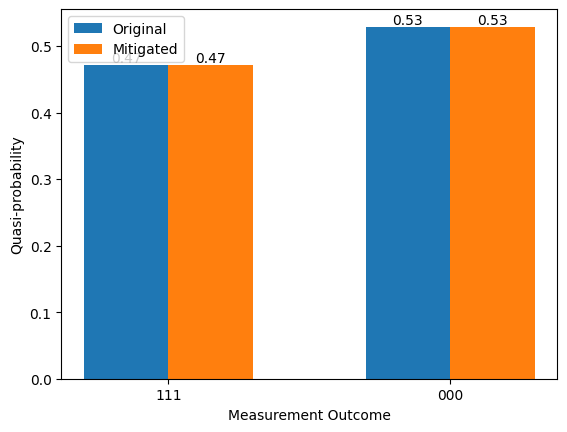

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import  Aer
from mthree import M3Mitigation
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create a quantum circuit (e.g., a GHZ state)
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure_all()

# Step 2: Transpile and execute the circuit on a noisy simulator backend
backend = Aer.get_backend('aer_simulator')
qc = transpile(qc, backend)
result = backend.run(qc, shots=1000).result()

# Step 3: Get the raw counts (original results)
raw_counts = result.get_counts()

# Step 4: Initialize M3 Mitigation and apply the correction
mit = M3Mitigation(backend)
mit.cals_from_system([0, 1, 2])
mit_counts = mit.apply_correction(raw_counts, qubits=[0, 1, 2])

# Step 5: Plot the original and mitigated results manually using Matplotlib
def plot_distribution(original_counts, mitigated_counts):
    labels = list(original_counts.keys())
    original_probs = [original_counts.get(label, 0) / sum(original_counts.values()) for label in labels]
    mitigated_probs = [mitigated_counts.get(label, 0) for label in labels]

    x = np.arange(len(labels))  # x-axis positions
    width = 0.3
    fig, ax = plt.subplots()

    # Plot bars
    original_bars = ax.bar(x - width / 2, original_probs, width, label='Original')
    mitigated_bars = ax.bar(x + width / 2, mitigated_probs, width, label='Mitigated')

    # Add text on bars
    for bars in [original_bars, mitigated_bars]:
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',
                    ha='center', va='bottom')

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('Measurement Outcome')
    ax.set_ylabel('Quasi-probability')
    ax.legend()
    plt.show()



# Step 6: Call the plot function to visualize
plot_distribution(raw_counts, mit_counts)
